## Qualitative experiment: BA-house

In [1]:
import pickle
import torch
from GNN_models import GCN_Conv_Sum
from PAGE import prototype_explanation
import warnings
warnings.filterwarnings("ignore")

### Dataset & Model preparation

In [2]:
# Load data
with open('ba_house_train_dataset.pkl', 'rb') as f:
    ba_house_train_list = pickle.load(f)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
GNN_ba_house = GCN_Conv_Sum(ba_house_train_list[0], latent_dim = [32, 32], device='cpu')
GNN_ba_house.load_state_dict(torch.load('GNN_ba_house_model.pt'))
GNN_ba_house.eval()

GCN_Conv_Sum(
  (convs): ModuleList(
    (0): GCNConv(3, 32)
    (1): GCNConv(32, 32)
  )
  (last_linear): Linear(in_features=32, out_features=1, bias=True)
)

### Results for PAGE

Prototype budget: 100%|██████████| 10/10 [03:10<00:00, 19.04s/it]


Return index: 0
Return probability: [0.998, 0.7877, 0.0263, 0.0263, 0.8574, 0.9925, 0.9925, 0.8574, 0.9925, 0.8574]


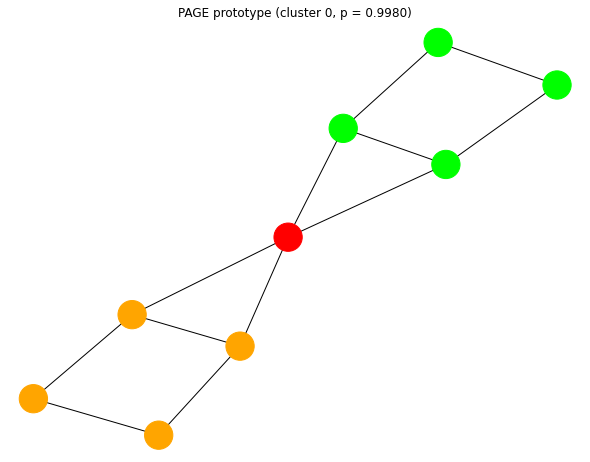

In [3]:
ba_house_PAGE_explainer = prototype_explanation(
    gnn_model=GNN_ba_house,
    dataset=ba_house_train_list,
    n_components=2,
    data_name="BA-house",
)

ba_house_PAGE_result = ba_house_PAGE_explainer.generate_prototype_quant(
    label=1,
    cluster_index=0,
    max_node=13,
    max_epochs=10000,
    print_index = True,
)
prob = GNN_ba_house(ba_house_PAGE_result).to("cpu").detach().item()
ba_house_PAGE_explainer.visualizing(
    ba_house_PAGE_result,
    data_type="BA-house",
    title=f"PAGE prototype (cluster 0, p = {prob:.4f})",
)


Prototype budget: 100%|██████████| 10/10 [03:05<00:00, 18.54s/it]


Return index: 2
Return probability: [0.9826, 1.0, 1.0, 0.9989, 0.8513, 0.0336, 0.2731, 0.9981, 0.9925, 0.9997]


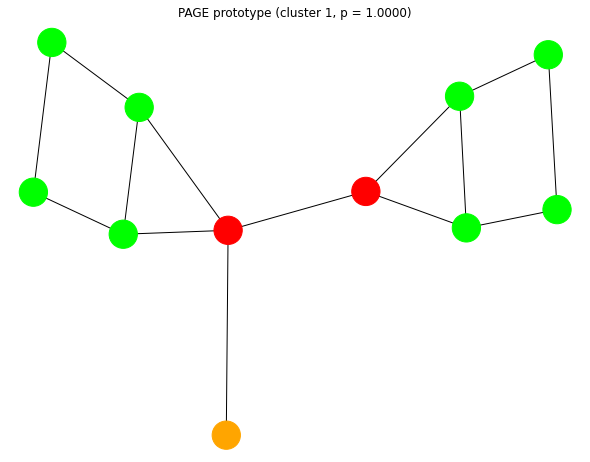

In [4]:
ba_house_PAGE_result = ba_house_PAGE_explainer.generate_prototype_quant(
    label=1,
    cluster_index=1,
    max_node=13,
    max_epochs=10000,
    print_index = True
)
prob = GNN_ba_house(ba_house_PAGE_result).to("cpu").detach().item()
ba_house_PAGE_explainer.visualizing(
    ba_house_PAGE_result,
    data_type="BA-house",
    title=f"PAGE prototype (cluster 1, p = {prob:.4f})",
)
